In [9]:
import pandas as pd
import sqlalchemy
import datetime as dt
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sqlite3

In [10]:
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)

weeks = [211002, 210925, 210918, 210911, 210904]
mta_data = get_data(weeks)


In [184]:
mta_data.count()

C/A          1049604
UNIT         1049604
SCP          1049604
STATION      1049604
LINENAME     1049604
DIVISION     1049604
DATE         1049604
TIME         1049604
ENTRIES      1049604
EXITS        1049604
DATE_TIME    1049604
dtype: int64

In [11]:
engine= sqlalchemy.create_engine('sqlite:///mta_data.db')
print(engine)

Engine(sqlite:///mta_data.db)


In [12]:
df = pd.read_sql('select * from mta_data limit 1;', engine)

In [186]:
mta_data = pd.read_sql('SELECT * FROM mta_data;', engine)

In [6]:
engine.table_names()


['mta_data']

In [13]:
mta_data.columns = [column.strip() for column in mta_data.columns]
mta_data.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [14]:
mta_data.DATE.value_counts().sort_index()

08/28/2021    30021
08/29/2021    29754
08/30/2021    30738
08/31/2021    29865
09/01/2021    30159
09/02/2021    29664
09/03/2021    29534
09/04/2021    29815
09/05/2021    29788
09/06/2021    29865
09/07/2021    30077
09/08/2021    29956
09/09/2021    29939
09/10/2021    30043
09/11/2021    29844
09/12/2021    30014
09/13/2021    30103
09/14/2021    30292
09/15/2021    29833
09/16/2021    29928
09/17/2021    29884
09/18/2021    29964
09/19/2021    29964
09/20/2021    30444
09/21/2021    30082
09/22/2021    30014
09/23/2021    30033
09/24/2021    29899
09/25/2021    29961
09/26/2021    29873
09/27/2021    30388
09/28/2021    30070
09/29/2021    30000
09/30/2021    30024
10/01/2021    29895
Name: DATE, dtype: int64

In [15]:

mta_data["DATE_TIME"] = pd.to_datetime(mta_data.DATE + " " + mta_data.TIME, 
                                            format="%m/%d/%Y %H:%M:%S")

In [17]:
(mta_data
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
1041351,S101,R070,00-00-02,ST. GEORGE,2021-09-14 16:00:00,2
1041267,S101,R070,00-00-02,ST. GEORGE,2021-09-01 00:00:00,2
1041258,S101,R070,00-00-02,ST. GEORGE,2021-08-30 12:00:00,2
1041425,S101,R070,00-00-02,ST. GEORGE,2021-09-27 00:00:00,2
1041424,S101,R070,00-00-02,ST. GEORGE,2021-09-26 20:00:00,2


In [18]:
mta_data.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], 
                          inplace=True, ascending=False)
mta_data.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [19]:
(mta_data
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2021-08-28 00:00:00,1
699566,R142,R293,01-00-00,34 ST-PENN STA,2021-09-04 14:00:00,1
699728,R142,R293,01-00-00,34 ST-PENN STA,2021-10-01 14:00:00,1
699729,R142,R293,01-00-00,34 ST-PENN STA,2021-10-01 18:00:00,1
699730,R142,R293,01-00-00,34 ST-PENN STA,2021-10-01 22:00:00,1


In [20]:
(mta_data
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .EXITS.count()
 .reset_index()
 .sort_values("EXITS", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,EXITS
0,A002,R051,02-00-00,59 ST,2021-08-28 00:00:00,1
699566,R142,R293,01-00-00,34 ST-PENN STA,2021-09-04 14:00:00,1
699728,R142,R293,01-00-00,34 ST-PENN STA,2021-10-01 14:00:00,1
699729,R142,R293,01-00-00,34 ST-PENN STA,2021-10-01 18:00:00,1
699730,R142,R293,01-00-00,34 ST-PENN STA,2021-10-01 22:00:00,1


In [21]:
mta_data = mta_data.drop(["DESC"], axis=1, errors="ignore")

In [111]:
data_daily = (mta_data
                        .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False)
                        .ENTRIES.first())

In [112]:
data_daily_2 = (mta_data
                       .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE", "DATE_TIME"],as_index=False)
                        .ENTRIES.first())
data_daily_2.sample(20)

,C/A,UNIT,SCP,STATION,DATE,DATE_TIME,ENTRIES
295179,N080,R138,00-03-00,W 4 ST-WASH SQ,09/13/2021,2021-09-13 05:00:00,79644
675267,R117,R343,00-00-01,FRANKLIN ST,09/01/2021,2021-09-01 09:00:00,3335270
77464,B018,R184,00-00-01,CORTELYOU RD,09/18/2021,2021-09-18 04:00:00,3603348
1029494,R641,R210,00-00-00,BEVERLY RD,09/12/2021,2021-09-12 04:00:00,931030
73909,B015,R098,01-00-02,CHURCH AV,09/14/2021,2021-09-14 08:00:00,7351895
709683,R154,R116,00-00-04,50 ST,09/01/2021,2021-09-01 16:00:00,2107621
567331,N605,R024,00-00-00,SUTPHIN-ARCHER,09/26/2021,2021-09-26 08:00:00,4936461
96695,B029,R172,00-00-04,BRIGHTON BEACH,09/30/2021,2021-09-30 20:00:00,16485371
310528,N094,R029,01-03-00,WORLD TRADE CTR,09/16/2021,2021-09-16 08:00:00,2218342
273036,N063,R011,02-03-00,42 ST-PORT AUTH,09/01/2021,2021-09-01 20:00:00,9077380


In [27]:
data_daily.head()

,C/A,UNIT,SCP,STATION,DATE,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,08/28/2021,2021-08-28 00:00:00,7625998
1,A002,R051,02-00-00,59 ST,08/28/2021,2021-08-28 04:00:00,7626014
2,A002,R051,02-00-00,59 ST,08/28/2021,2021-08-28 08:00:00,7626024
3,A002,R051,02-00-00,59 ST,08/28/2021,2021-08-28 12:00:00,7626086
4,A002,R051,02-00-00,59 ST,08/28/2021,2021-08-28 16:00:00,7626206


In [113]:
data_daily[["PREV_DATE", "PREV_ENTRIES"]] = (data_daily
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"]
                                                       .apply(lambda grp: grp.shift(1)))

/var/folders/26/zk3z8t81481g1_jznhx727yh0000gn/T/ipykernel_10556/1704973439.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [115]:
data_daily.tail()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
174880,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/27/2021,5554,09/26/2021,5554.0
174881,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/28/2021,5554,09/27/2021,5554.0
174882,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/29/2021,5554,09/28/2021,5554.0
174883,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/30/2021,5554,09/29/2021,5554.0
174884,TRAM2,R469,00-05-01,RIT-ROOSEVELT,10/01/2021,5554,09/30/2021,5554.0


In [116]:
data_daily.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [117]:
data_daily[data_daily["ENTRIES"] < data_daily["PREV_ENTRIES"]].head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
1366,A011,R080,01-03-00,57 ST-7 AV,08/29/2021,885577993,08/28/2021,885578194.0
1367,A011,R080,01-03-00,57 ST-7 AV,08/30/2021,885577734,08/29/2021,885577993.0
1368,A011,R080,01-03-00,57 ST-7 AV,08/31/2021,885577465,08/30/2021,885577734.0
1369,A011,R080,01-03-00,57 ST-7 AV,09/01/2021,885577193,08/31/2021,885577465.0
1370,A011,R080,01-03-00,57 ST-7 AV,09/02/2021,885576987,09/01/2021,885577193.0


In [118]:
(data_daily[data_daily["ENTRIES"] < data_daily["PREV_ENTRIES"]]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
    .size())

C/A   UNIT  SCP       STATION        
A011  R080  01-03-00  57 ST-7 AV         34
A049  R088  02-05-00  CORTLANDT ST        7
A066  R118  00-00-00  CANAL ST           34
B021  R228  00-05-00  AVENUE J            1
C008  R099  00-00-00  DEKALB AV          34
                                         ..
R528  R097  00-05-01  JUNCTION BLVD       1
            00-06-00  JUNCTION BLVD       1
R622  R123  00-00-00  FRANKLIN AV        34
R730  R431  00-00-04  EASTCHSTER/DYRE    33
S101  R070  00-00-02  ST. GEORGE          6
Length: 122, dtype: int64

In [119]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        return 0
    return counter

_ = data_daily.apply(get_daily_counts, axis=1, max_counter=20000)

393216 1.0
6 23972.0
12 468610.0
58 317664.0
63 9631506.0
310 5609562.0
351 132517.0
35 9768753.0
33565227 188178.0
50 31167.0
1064 150473.0
511 3272795.0
284 124319.0
616 39027.0
1966428 196464.0
393216 461940.0
263 557914756.0
393220 458784.0
974 197582.0
1059 43796.0
223 26258.0
261 120093.0
291 452864.0
372 71428.0
157 129729.0
12666 341621.0
342543 12666.0
628 97038.0
220 624575.0
159 28227.0
260 75854.0
616 55059.0
46 97672.0
763 40838.0
316 319276.0
21 120055.0
157 49951.0
5 11123659.0
256 3153907.0
342 27731.0
389 509445.0
0 458872.0
178 164477.0
94 63917.0
393232 458793.0
19 2570919.0
589946 13685.0
24 24069.0
205 118568.0
67 1040931923.0
285 3530461.0
97657 771.0
201331968 798740.0
154 5768873.0
1089962154 146746170.0
3539010 51735353.0
78 53414.0
112 7682427.0
34 3478770.0
1189019240 3740789.0
346167 14045092.0
14051313 346213.0
774447 9475375.0
9482240 774522.0
7979566 789214.0
796277 7979671.0
1278449 8197329.0
8205884 1278639.0
635 4005927.0
4006679 635.0
0 381007.0
38212

In [120]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter


data_daily["DAILY_ENTRIES"] = data_daily.apply(get_daily_counts, axis=1, max_counter=20000)

393216 1.0
6 23972.0
12 468610.0
58 317664.0
63 9631506.0
310 5609562.0
351 132517.0
35 9768753.0
33565227 188178.0
50 31167.0
1064 150473.0
511 3272795.0
284 124319.0
616 39027.0
1966428 196464.0
393216 461940.0
263 557914756.0
393220 458784.0
974 197582.0
1059 43796.0
223 26258.0
261 120093.0
291 452864.0
372 71428.0
157 129729.0
12666 341621.0
342543 12666.0
628 97038.0
220 624575.0
159 28227.0
260 75854.0
616 55059.0
46 97672.0
763 40838.0
316 319276.0
21 120055.0
157 49951.0
5 11123659.0
256 3153907.0
342 27731.0
389 509445.0
0 458872.0
178 164477.0
94 63917.0
393232 458793.0
19 2570919.0
589946 13685.0
24 24069.0
205 118568.0
67 1040931923.0
285 3530461.0
97657 771.0
201331968 798740.0
154 5768873.0
1089962154 146746170.0
3539010 51735353.0
78 53414.0
112 7682427.0
34 3478770.0
1189019240 3740789.0
346167 14045092.0
14051313 346213.0
774447 9475375.0
9482240 774522.0
7979566 789214.0
796277 7979671.0
1278449 8197329.0
8205884 1278639.0
635 4005927.0
4006679 635.0
0 381007.0
38212

In [121]:
ca_unit_station_daily = data_daily.groupby(["C/A", "UNIT", "STATION", "DATE"])[['DAILY_ENTRIES']].sum().reset_index()
ca_unit_station_daily.head()

,C/A,UNIT,STATION,DATE,DAILY_ENTRIES
0,A002,R051,59 ST,08/29/2021,2883.0
1,A002,R051,59 ST,08/30/2021,4569.0
2,A002,R051,59 ST,08/31/2021,5094.0
3,A002,R051,59 ST,09/01/2021,4785.0
4,A002,R051,59 ST,09/02/2021,3614.0


In [122]:
station_daily = data_daily.groupby(["STATION", "DATE"])[['DAILY_ENTRIES']].sum().reset_index()
station_daily.head()

,STATION,DATE,DAILY_ENTRIES
0,1 AV,08/29/2021,6541.0
1,1 AV,08/30/2021,6927.0
2,1 AV,08/31/2021,7780.0
3,1 AV,09/01/2021,7819.0
4,1 AV,09/02/2021,5688.0


In [126]:
#help
station_average = station_daily.groupby('STATION').mean()\
    .sort_values('DAILY_ENTRIES', ascending=False)\
    .reset_index()

station_average.head()

,STATION,DAILY_ENTRIES
0,34 ST-PENN STA,46164.382353
1,34 ST-HERALD SQ,35553.852941
2,GRD CNTRL-42 ST,34013.058824
3,23 ST,32161.352941
4,42 ST-PORT AUTH,32141.264706


In [154]:
station_totals = station_daily.groupby('STATION').sum()\
    .sort_values('DAILY_ENTRIES', ascending=False)\
    .reset_index()

station_totals.head()

,STATION,DAILY_ENTRIES
0,34 ST-PENN STA,1569589.0
1,34 ST-HERALD SQ,1208831.0
2,GRD CNTRL-42 ST,1156444.0
3,23 ST,1093486.0
4,42 ST-PORT AUTH,1092803.0


In [157]:
St_herald_daily = data_daily[
(data_daily["STATION"] == "34 ST-HERALD SQ")&
(data_daily["C/A"] == "N506")&
(data_daily["UNIT"] == "R022")&
(data_daily["SCP"] == "00-05-05")]

St_herald_daily.sort_values("DAILY_ENTRIES", ascending = True 
                        ).head()



,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
84088,N506,R022,00-05-05,34 ST-HERALD SQ,09/02/2021,2553853,09/01/2021,2552657.0,1196.0
84091,N506,R022,00-05-05,34 ST-HERALD SQ,09/05/2021,2558491,09/04/2021,2557183.0,1308.0
84098,N506,R022,00-05-05,34 ST-HERALD SQ,09/12/2021,2570528,09/11/2021,2569192.0,1336.0
84084,N506,R022,00-05-05,34 ST-HERALD SQ,08/29/2021,2547577,08/28/2021,2546204.0,1373.0
84092,N506,R022,00-05-05,34 ST-HERALD SQ,09/06/2021,2559880,09/05/2021,2558491.0,1389.0


In [183]:

St_herald_daily_2 = data_daily[
(data_daily["STATION"] == "34 ST-HERALD SQ")&
(data_daily["C/A"] == "N506")&
(data_daily["UNIT"] == "R022")&
(data_daily["SCP"] == "00-05-05")]

St_herald_daily.sort_values("DAILY_ENTRIES", ascending = True 
                        ).tail(100) 


,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES,DAY_OF_WEEK_NUM,WEEK_OF_YEAR
84088,N506,R022,00-05-05,34 ST-HERALD SQ,09/02/2021,2553853,09/01/2021,2552657.0,1196.0,3,35
84091,N506,R022,00-05-05,34 ST-HERALD SQ,09/05/2021,2558491,09/04/2021,2557183.0,1308.0,6,35
84098,N506,R022,00-05-05,34 ST-HERALD SQ,09/12/2021,2570528,09/11/2021,2569192.0,1336.0,6,36
84084,N506,R022,00-05-05,34 ST-HERALD SQ,08/29/2021,2547577,08/28/2021,2546204.0,1373.0,6,34
84092,N506,R022,00-05-05,34 ST-HERALD SQ,09/06/2021,2559880,09/05/2021,2558491.0,1389.0,0,36
84105,N506,R022,00-05-05,34 ST-HERALD SQ,09/19/2021,2583879,09/18/2021,2582353.0,1526.0,6,37
84087,N506,R022,00-05-05,34 ST-HERALD SQ,09/01/2021,2552657,08/31/2021,2551080.0,1577.0,2,35
84112,N506,R022,00-05-05,34 ST-HERALD SQ,09/26/2021,2597226,09/25/2021,2595647.0,1579.0,6,38
84090,N506,R022,00-05-05,34 ST-HERALD SQ,09/04/2021,2557183,09/03/2021,2555591.0,1592.0,5,35
84097,N506,R022,00-05-05,34 ST-HERALD SQ,09/11/2021,2569192,09/10/2021,2567547.0,1645.0,5,36


In [45]:
St_herald_daily_2= St_herald_daily[St_herald_daily["DATE"]=="09/30/2021"]
St_herald_daily_2.head()

,C/A,UNIT,SCP,STATION,DATE,DATE_TIME,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
505799,N506,R022,00-05-05,34 ST-HERALD SQ,09/30/2021,2021-09-30 00:00:00,2603376,09/29/2021,2603166.0,210.0
505800,N506,R022,00-05-05,34 ST-HERALD SQ,09/30/2021,2021-09-30 04:00:00,2603402,09/30/2021,2603376.0,26.0
505801,N506,R022,00-05-05,34 ST-HERALD SQ,09/30/2021,2021-09-30 08:00:00,2603702,09/30/2021,2603402.0,300.0
505802,N506,R022,00-05-05,34 ST-HERALD SQ,09/30/2021,2021-09-30 12:00:00,2604124,09/30/2021,2603702.0,422.0
505803,N506,R022,00-05-05,34 ST-HERALD SQ,09/30/2021,2021-09-30 16:00:00,2604578,09/30/2021,2604124.0,454.0


Text(0.5, 1.0, 'Daily Entries for 34th St- Penn Station')

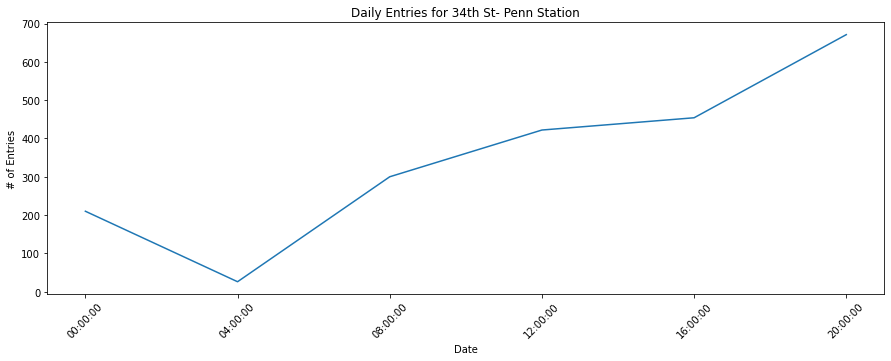

In [446]:
plt.figure(figsize=(15,5))
plt.plot(St_herald_daily_2['TIME'], St_herald_daily_2['DAILY_ENTRIES'])
plt.ylabel('# of Entries')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title('Daily Entries for 34th St- Penn Station')

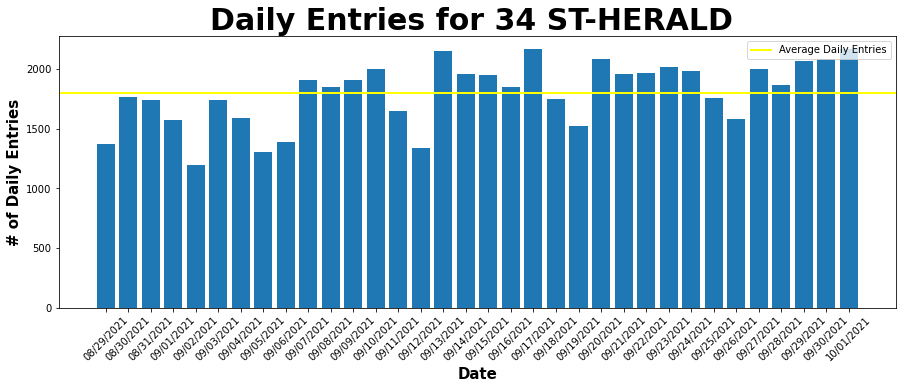

In [160]:
plt.figure(figsize=(15,5))
plt.bar(St_herald_daily['DATE'], St_herald_daily['DAILY_ENTRIES'])
plt.ylabel('# of Daily Entries', fontsize = 15, weight = 'bold')
plt.xlabel('Date', fontsize = 15, weight = 'bold')
plt.xticks(rotation=45)
plt.title('Daily Entries for 34 ST-HERALD ', fontsize = 30, weight = 'bold')
plt.axhline(St_herald_daily["DAILY_ENTRIES"].mean(), color='yellow', linewidth=2, label = "Average Daily Entries")
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper right')


In [162]:
St_herald_daily['DAY_OF_WEEK_NUM'] = pd.to_datetime(St_herald_daily['DATE']).dt.dayofweek
St_herald_daily['WEEK_OF_YEAR'] = pd.to_datetime(St_herald_daily['DATE']).dt.week
St_herald_daily.sort_values("DAILY_ENTRIES", ascending = True 
                        ).head()

/var/folders/26/zk3z8t81481g1_jznhx727yh0000gn/T/ipykernel_10556/1840652489.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/26/zk3z8t81481g1_jznhx727yh0000gn/T/ipykernel_10556/1840652489.py:2: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.

/var/folders/26/zk3z8t81481g1_jznhx727yh0000gn/T/ipykernel_10556/1840652489.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES,DAY_OF_WEEK_NUM,WEEK_OF_YEAR
84088,N506,R022,00-05-05,34 ST-HERALD SQ,09/02/2021,2553853,09/01/2021,2552657.0,1196.0,3,35
84091,N506,R022,00-05-05,34 ST-HERALD SQ,09/05/2021,2558491,09/04/2021,2557183.0,1308.0,6,35
84098,N506,R022,00-05-05,34 ST-HERALD SQ,09/12/2021,2570528,09/11/2021,2569192.0,1336.0,6,36
84084,N506,R022,00-05-05,34 ST-HERALD SQ,08/29/2021,2547577,08/28/2021,2546204.0,1373.0,6,34
84092,N506,R022,00-05-05,34 ST-HERALD SQ,09/06/2021,2559880,09/05/2021,2558491.0,1389.0,0,36


In [163]:
St_herald_daily["DAILY_ENTRIES"].mean()

1800.3529411764705

Text(0.5, 1.0, 'Ridership per day for 34th ST Herald')

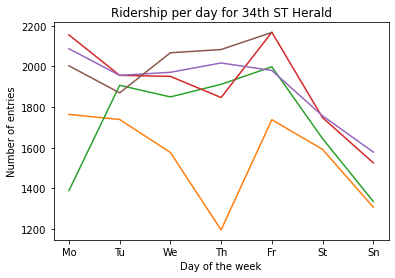

In [164]:
for i, group in St_herald_daily.groupby('WEEK_OF_YEAR'):
    plt.plot(group['DAY_OF_WEEK_NUM'], group['DAILY_ENTRIES'])
    
    
plt.xlabel('Day of the week')
plt.ylabel('Number of entries')
plt.xticks(np.arange(7),['Mo','Tu','We','Th','Fr','St','Sn'])
plt.title('Ridership per day for 34th ST Herald')

In [165]:
daily_34st = data_daily[
(data_daily["STATION"] == "34 ST-PENN STA")&
(data_daily["C/A"] == "R138")&
(data_daily["UNIT"] == "R293")&
(data_daily["SCP"] == "00-00-00")]


daily_34st.sort_values("DAILY_ENTRIES", ascending = False 
                        ).tail(10)

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
115934,R138,R293,00-00-00,34 ST-PENN STA,09/11/2021,1195534,09/10/2021,1193954.0,1580.0
115948,R138,R293,00-00-00,34 ST-PENN STA,09/25/2021,1224215,09/24/2021,1222650.0,1565.0
115929,R138,R293,00-00-00,34 ST-PENN STA,09/06/2021,1185452,09/05/2021,1183908.0,1544.0
115941,R138,R293,00-00-00,34 ST-PENN STA,09/18/2021,1209862,09/17/2021,1208362.0,1500.0
115949,R138,R293,00-00-00,34 ST-PENN STA,09/26/2021,1225688,09/25/2021,1224215.0,1473.0
115942,R138,R293,00-00-00,34 ST-PENN STA,09/19/2021,1211324,09/18/2021,1209862.0,1462.0
115928,R138,R293,00-00-00,34 ST-PENN STA,09/05/2021,1183908,09/04/2021,1182509.0,1399.0
115921,R138,R293,00-00-00,34 ST-PENN STA,08/29/2021,1172654,08/28/2021,1171295.0,1359.0
115927,R138,R293,00-00-00,34 ST-PENN STA,09/04/2021,1182509,09/03/2021,1181205.0,1304.0
115925,R138,R293,00-00-00,34 ST-PENN STA,09/02/2021,1179432,09/01/2021,1178724.0,708.0


In [166]:
daily_34st["DAILY_ENTRIES"].mean()

1911.9117647058824

In [181]:
stations_avrg= [["GRD CNTRL-42 ST", 2595], ["34 ST-PENN STA", 1912], ["34 ST-HERALD SQ", 1800] ]
df_avg = pd.DataFrame(stations_avrg, columns = ["Station", "Average Entries "])
df_avg

,Station,Average Entries
0,GRD CNTRL-42 ST,2595
1,34 ST-PENN STA,1912
2,34 ST-HERALD SQ,1800


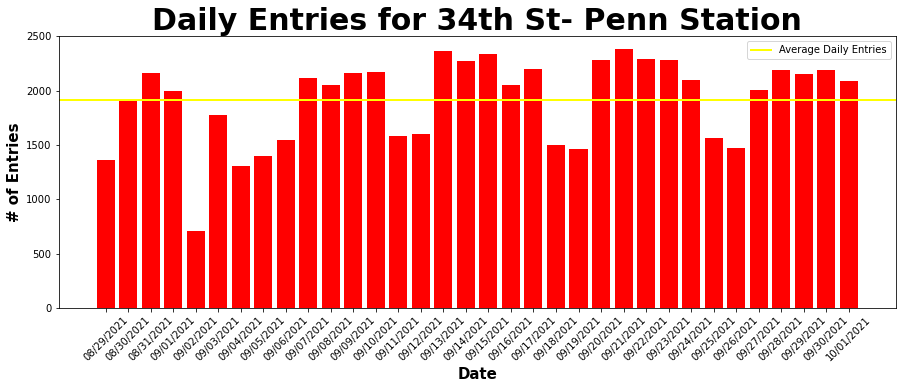

In [167]:
plt.figure(figsize=(15,5))
plt.bar(daily_34st['DATE'], daily_34st['DAILY_ENTRIES'], color = "red")
plt.ylabel('# of Entries', fontsize = 15, weight = 'bold')
plt.xlabel('Date', fontsize = 15, weight = 'bold')
plt.xticks(rotation=45)
plt.title('Daily Entries for 34th St- Penn Station', fontsize = 30, weight = 'bold')
plt.axhline(daily_34st["DAILY_ENTRIES"].mean(), color='yellow', linewidth=2, label = "Average Daily Entries")
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper right')

In [323]:
daily_34st['DAY_OF_WEEK_NUM'] = pd.to_datetime(daily_34st['DATE']).dt.dayofweek
daily_34st['WEEK_OF_YEAR'] = pd.to_datetime(daily_34st['DATE']).dt.week
daily_34st.head()

/var/folders/26/zk3z8t81481g1_jznhx727yh0000gn/T/ipykernel_2384/1026322381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_34st['DAY_OF_WEEK_NUM'] = pd.to_datetime(daily_34st['DATE']).dt.dayofweek
/var/folders/26/zk3z8t81481g1_jznhx727yh0000gn/T/ipykernel_2384/1026322381.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  daily_34st['WEEK_OF_YEAR'] = pd.to_datetime(daily_34st['DATE']).dt.week
/var/folders/26/zk3z8t81481g1_jznhx727yh0000gn/T/ipykernel_2384/1026322381.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES,DAY_OF_WEEK_NUM,WEEK_OF_YEAR
115921,R138,R293,00-00-00,34 ST-PENN STA,08/29/2021,1172654,08/28/2021,1171295.0,1359.0,6,34
115922,R138,R293,00-00-00,34 ST-PENN STA,08/30/2021,1174567,08/29/2021,1172654.0,1913.0,0,35
115923,R138,R293,00-00-00,34 ST-PENN STA,08/31/2021,1176727,08/30/2021,1174567.0,2160.0,1,35
115924,R138,R293,00-00-00,34 ST-PENN STA,09/01/2021,1178724,08/31/2021,1176727.0,1997.0,2,35
115925,R138,R293,00-00-00,34 ST-PENN STA,09/02/2021,1179432,09/01/2021,1178724.0,708.0,3,35


Text(0.5, 1.0, 'Ridership per day for 34th ST Penn Station')

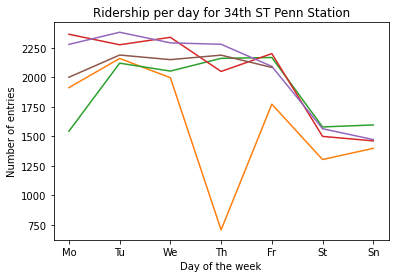

In [324]:
for i, group in daily_34st.groupby('WEEK_OF_YEAR'):
    plt.plot(group['DAY_OF_WEEK_NUM'], group['DAILY_ENTRIES'])
    
    
plt.xlabel('Day of the week')
plt.ylabel('Number of entries')
plt.xticks(np.arange(7),['Mo','Tu','We','Th','Fr','St','Sn'])
plt.title('Ridership per day for 34th ST Penn Station')

In [146]:
grd_cntrl_daily = data_daily[
(data_daily["STATION"] == "GRD CNTRL-42 ST")&
(data_daily["C/A"] == "R238")&
(data_daily["UNIT"] == "R046")&
(data_daily["SCP"] == "00-06-01")]

grd_cntrl_daily.sort_values("DAILY_ENTRIES", ascending = False 
                        ).head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
135546,R238,R046,00-06-01,GRD CNTRL-42 ST,09/22/2021,548006,09/21/2021,544735.0,3271.0
135554,R238,R046,00-06-01,GRD CNTRL-42 ST,09/30/2021,570676,09/29/2021,567425.0,3251.0
135539,R238,R046,00-06-01,GRD CNTRL-42 ST,09/15/2021,529440,09/14/2021,526191.0,3249.0
135548,R238,R046,00-06-01,GRD CNTRL-42 ST,09/24/2021,554227,09/23/2021,551004.0,3223.0
135545,R238,R046,00-06-01,GRD CNTRL-42 ST,09/21/2021,544735,09/20/2021,541595.0,3140.0


In [145]:
# HELP
grd_cntrl_daily.DAILY_ENTRIES.mean()

2594.4117647058824

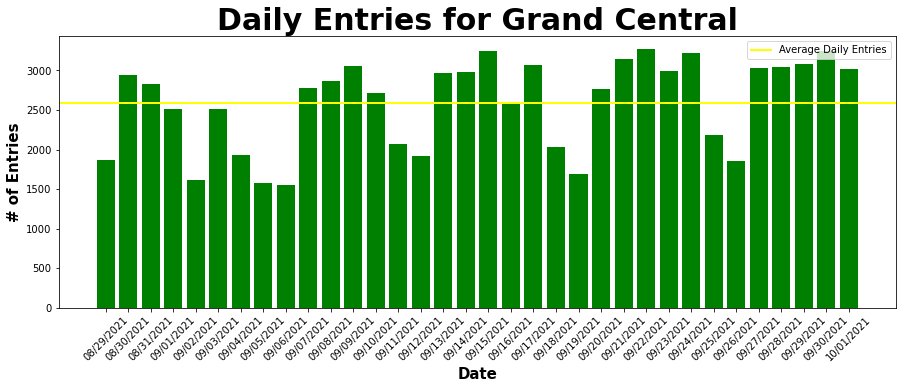

In [148]:
plt.figure(figsize=(15,5))
plt.bar(grd_cntrl_daily['DATE'], grd_cntrl_daily['DAILY_ENTRIES'], color = "green")
plt.ylabel('# of Entries', fontsize = 15, weight = 'bold')
plt.xlabel('Date', fontsize = 15, weight = 'bold')
plt.xticks(rotation=45)
plt.title('Daily Entries for Grand Central', fontsize = 30, weight = 'bold')
plt.axhline(grd_cntrl_daily["DAILY_ENTRIES"].mean(), color='yellow', linewidth=2, label = "Average Daily Entries")
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper right')

In [327]:
grd_cntrl_daily['DAY_OF_WEEK_NUM'] = pd.to_datetime(grd_cntrl_daily['DATE']).dt.dayofweek
grd_cntrl_daily['WEEK_OF_YEAR'] = pd.to_datetime(grd_cntrl_daily['DATE']).dt.week
grd_cntrl_daily.head()

/var/folders/26/zk3z8t81481g1_jznhx727yh0000gn/T/ipykernel_2384/1993822096.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grd_cntrl_daily['DAY_OF_WEEK_NUM'] = pd.to_datetime(grd_cntrl_daily['DATE']).dt.dayofweek
/var/folders/26/zk3z8t81481g1_jznhx727yh0000gn/T/ipykernel_2384/1993822096.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  grd_cntrl_daily['WEEK_OF_YEAR'] = pd.to_datetime(grd_cntrl_daily['DATE']).dt.week
/var/folders/26/zk3z8t81481g1_jznhx727yh0000gn/T/ipykernel_2384/1993822096.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES,DAY_OF_WEEK_NUM,WEEK_OF_YEAR
135522,R238,R046,00-06-01,GRD CNTRL-42 ST,08/29/2021,487361,08/28/2021,485491.0,1870.0,6,34
135523,R238,R046,00-06-01,GRD CNTRL-42 ST,08/30/2021,490309,08/29/2021,487361.0,2948.0,0,35
135524,R238,R046,00-06-01,GRD CNTRL-42 ST,08/31/2021,493132,08/30/2021,490309.0,2823.0,1,35
135525,R238,R046,00-06-01,GRD CNTRL-42 ST,09/01/2021,495646,08/31/2021,493132.0,2514.0,2,35
135526,R238,R046,00-06-01,GRD CNTRL-42 ST,09/02/2021,497257,09/01/2021,495646.0,1611.0,3,35


Text(0.5, 1.0, 'Ridership per day for Grand Central')

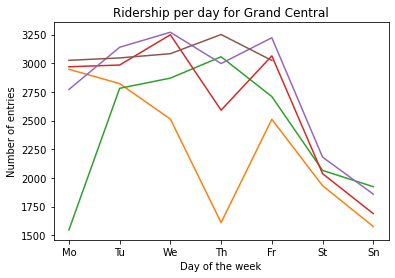

In [328]:
for i, group in grd_cntrl_daily.groupby('WEEK_OF_YEAR'):
    plt.plot(group['DAY_OF_WEEK_NUM'], group['DAILY_ENTRIES'])
    
    
plt.xlabel('Day of the week')
plt.ylabel('Number of entries')
plt.xticks(np.arange(7),['Mo','Tu','We','Th','Fr','St','Sn'])
plt.title('Ridership per day for Grand Central')

In [ ]:
for i, group in grd_cntrl_daily.groupby('STATION'):
    plt.plot(group['DAY_OF_WEEK_NUM'], group['DAILY_ENTRIES'])
    
    
plt.xlabel('Day of the week')
plt.ylabel('Number of entries')
plt.xticks(np.arange(7),['Mo','Tu','We','Th','Fr','St','Sn'])
plt.title('Ridership per day for Grand Central')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

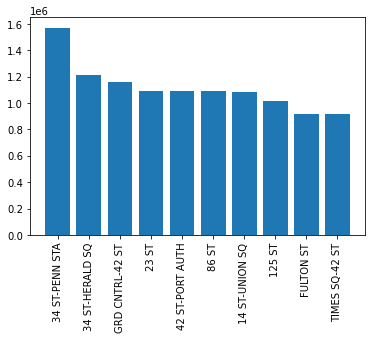

In [329]:
plt.bar(x=station_totals['STATION'][:10], height=station_totals['DAILY_ENTRIES'][:10])
plt.xticks(rotation=90)